# Final 
### Ahmet Buğra Taksuk
### 2017402168
- In this study, the aim is to predict hourly market clearing prices of Electricty Data. The data consist of hourly production values and independent variables of how the electricity consumption is produced between 2021-05-22 and 2021-06-21 . For testing purposes, I will examine the data until the start of the Dtesting period which is the last 30 days of dataset. It was hard to concatenate hour and date column in pandas so I manipulated the date in Excel and then imported the pandas. 

In [125]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Introduction

## 1 ) Importing the Data and Manipulations

In [135]:
mcp = pd.read_csv("mcp.csv")
mcp.drop('Unnamed: 0',axis='columns', inplace=True)
mcp["date"] = pd.to_datetime(mcp["datetime"], format = "%Y-%m-%d %H:%M:%S") # converting event date into datetime object
mcp['month'] = mcp['date'].dt.month #adding month information as a numeric variable 
mcp['day'] = mcp['date'].dt.weekday #adding day information as a numeric variable 
mcp.set_index("date" , inplace = True) # setting index time series 
mcp.head()

,hour,mcp_try,mcp_dollars,mcp_euro,load_plan,total_prod,natural_gas,wind,lignite,black_coal,...,dam,naphta,biomass,river,other,datetime,Month,w_day,month,day
date,,,,,,,,,,,,,,,,,,,,,
2015-06-01 00:00:00,0,103.78,39.03,35.61,25600,20657.07,6198.44,168.91,2799.0,742.0,...,5056.85,0.0,0.0,1159.07,140.0,2015-06-01 00:00:00,Jun,Mon,6,0
2015-06-01 01:00:00,1,87.99,33.10,30.19,23900,20292.34,6391.14,165.56,2799.0,630.0,...,4833.05,0.0,0.0,1133.78,140.0,2015-06-01 01:00:00,Jun,Mon,6,0
2015-06-01 02:00:00,2,49.06,18.45,16.83,23000,19665.90,6403.34,171.68,2799.0,630.0,...,4726.40,0.0,0.0,1124.68,140.0,2015-06-01 02:00:00,Jun,Mon,6,0
2015-06-01 03:00:00,3,33.77,12.70,11.59,22600,19650.03,6388.33,182.33,2799.0,630.0,...,4824.45,0.0,0.0,1082.12,140.0,2015-06-01 03:00:00,Jun,Mon,6,0
2015-06-01 04:00:00,4,28.93,10.88,9.93,22500,19663.62,6299.83,189.04,2799.0,630.0,...,4797.70,0.0,0.0,1203.24,140.0,2015-06-01 04:00:00,Jun,Mon,6,0


### Choosing Currency 
- Since the variance in the USD and EUR smaller than TRY it is sensible to chose one of the two. I am going to choose USD since the overall global prices such as oil prices is declared upon USD. 

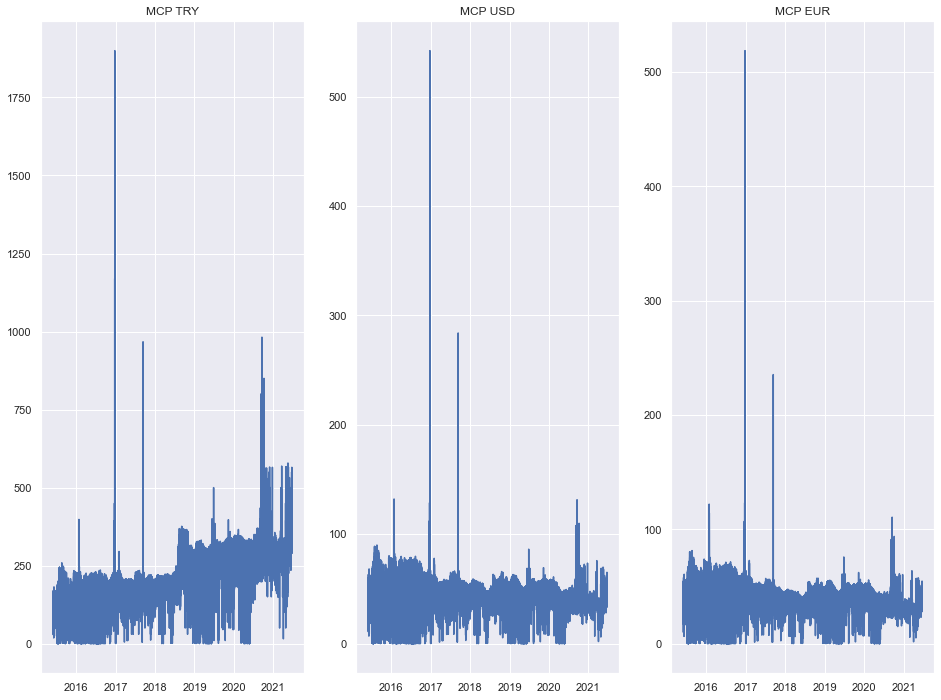

In [136]:
sns.set(rc={'figure.figsize':(16,12)})
plt.subplot(1, 3, 1)
plt.plot(mcp.index, mcp.mcp_try)
plt.title("MCP TRY");
plt.subplot(1, 3, 2)
plt.plot(mcp.index, mcp.mcp_dollars)
plt.title("MCP USD");
plt.subplot(1, 3, 3)
plt.plot(mcp.index, mcp.mcp_euro)
plt.title("MCP EUR");

### Splitting the train and test data 

In [137]:
train_data = pd.DataFrame(mcp["mcp_dollars"])
train_data.drop(train_data.head(24*365*5-24*30*5).index, inplace = True) #I dropped this column because my pc is broke several times during model fitting 
train_data

,mcp_dollars
date,
2020-01-01 00:00:00,52.46
2020-01-01 01:00:00,52.73
2020-01-01 02:00:00,52.37
2020-01-01 03:00:00,52.30
2020-01-01 04:00:00,33.67
...,...
2021-06-21 19:00:00,51.16
2021-06-21 20:00:00,65.21
2021-06-21 21:00:00,65.21


In [138]:
test_data = train_data.tail(31*24)
test_data

,mcp_dollars
date,
2021-05-22 00:00:00,44.94
2021-05-22 01:00:00,44.25
2021-05-22 02:00:00,43.40
2021-05-22 03:00:00,42.93
2021-05-22 04:00:00,42.34
...,...
2021-06-21 19:00:00,51.16
2021-06-21 20:00:00,65.21
2021-06-21 21:00:00,65.21


In [139]:
train_data.drop(train_data.tail(31*24).index, inplace=True)
train_data

,mcp_dollars
date,
2020-01-01 00:00:00,52.46
2020-01-01 01:00:00,52.73
2020-01-01 02:00:00,52.37
2020-01-01 03:00:00,52.30
2020-01-01 04:00:00,33.67
...,...
2021-05-21 19:00:00,45.12
2021-05-21 20:00:00,45.40
2021-05-21 21:00:00,45.24


### Comments on the shape of plot(Stationarity)
- To understand better the shape of the plot, I chose two random monthly interval. From the plot, we can see that the seasonality exists since there is similarpatterns of daily peaks and lows in two different months .

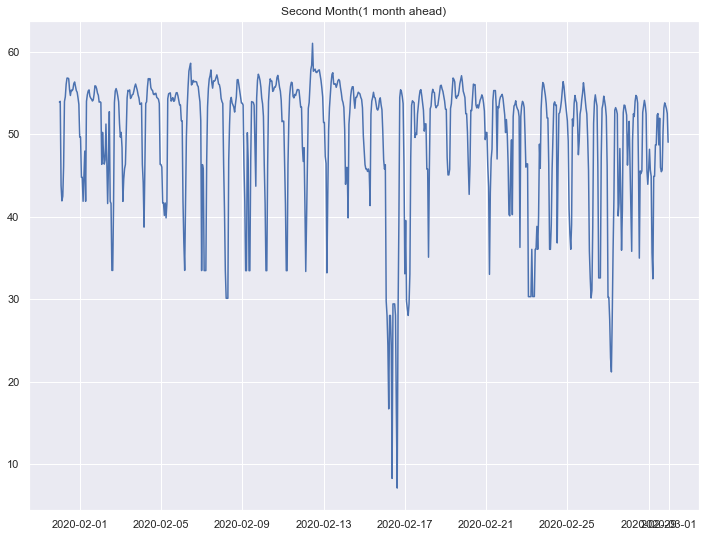

In [140]:
sns.set(rc={'figure.figsize':(12,9)})
plt.title("Second Month(1 month ahead)")
plt.plot(train_data[24*30:24*60])
plt.show()

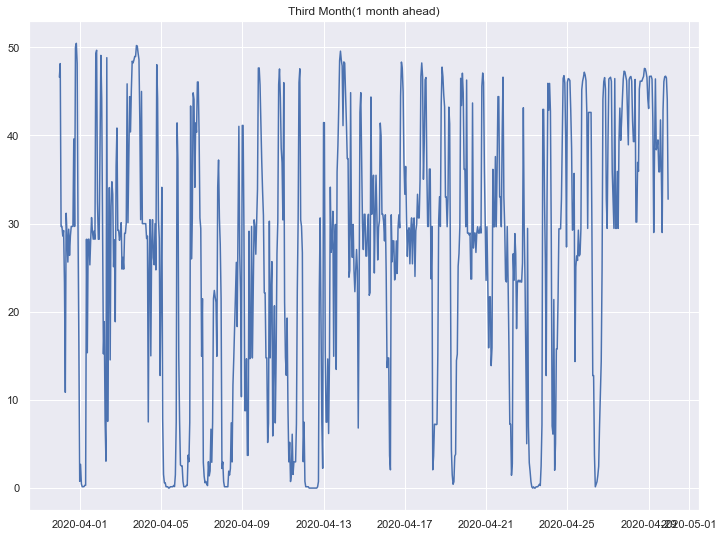

In [24]:
sns.set(rc={'figure.figsize':(12,9)})
plt.title("Third Month(1 month ahead)")
plt.plot(train_data[24*90:24*120])
plt.show()

### ACF and PACF plots 
- From the ACF plot, we see that there is a similar pattern every 24 hours. We already know that electricity consumption data has a seasonal pattern on hourly basis so it clarifies our findings. Also the PACF function shows that lag 1 is correlated with the next hours electricty consumption highly. 

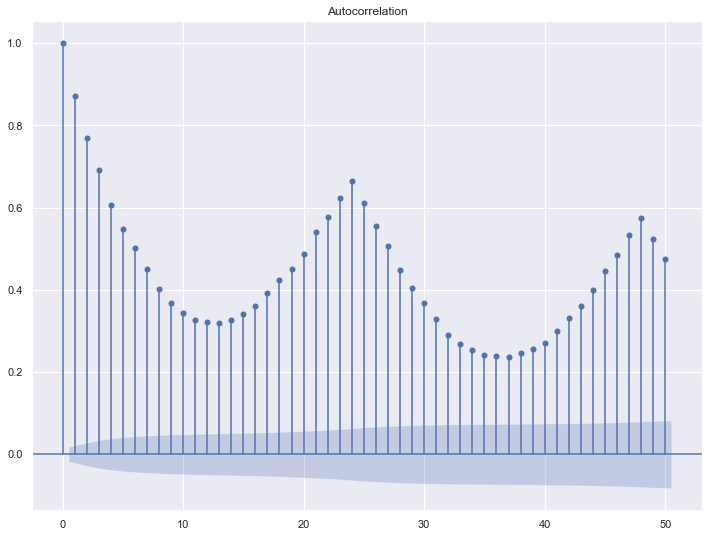

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_data, lags = 50)
plt.show();

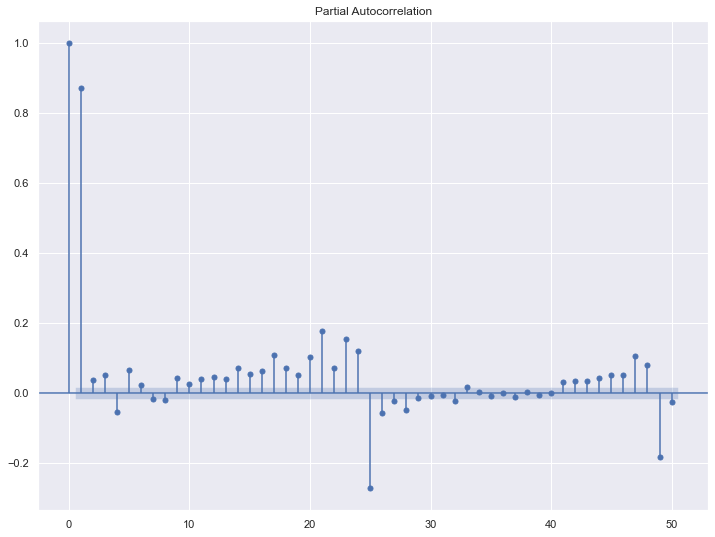

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train_data, lags = 50)
plt.show();

## 2 ) Summary statistics 

In [27]:
train_data.describe().T # overall statistics 

,count,mean,std,min,25%,50%,75%,max
mcp_dollars,12168.0,40.214829,10.510642,0.0,36.09,41.51,45.3,131.52


In [28]:
train_data.isnull().values.any() # checked whether there is null values or not  

False

### Outlier Detection
- Since some of the points are really high on the train data, it is reasonable to discard some of them. This day could be special days that we are accustomed to in electricty consumption market. 

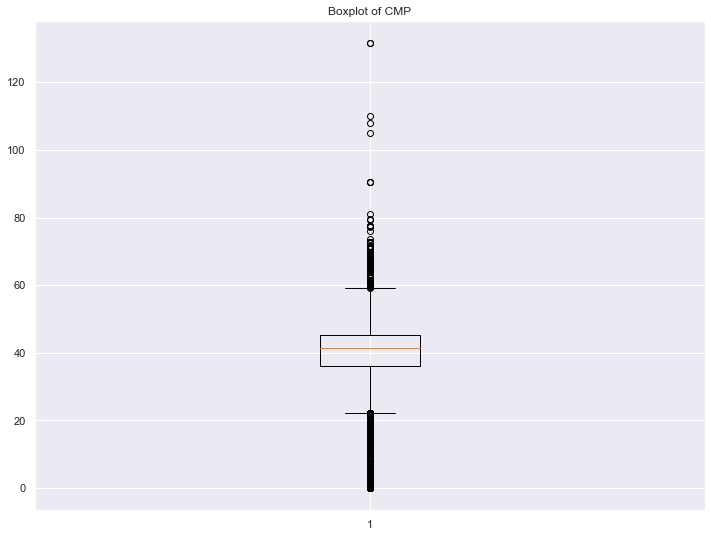

In [29]:
plt.title("Boxplot of CMP")
plt.boxplot(train_data)
plt.show();

# Analysis 

# METHOD A

## 3 ) Seasonality and Trend Analysis
- For the decompositon I am going to choose the frequency as 24 hours since the ACF plots has similar pattern every 24 hours. This could be because the daily MCP is declared every day at 12:00 and the consumption in the night and day is different drom each other.  I chose the additive model since there can be zero values in the data, it can be a problem predicting the values. 

## Daily Decomposition

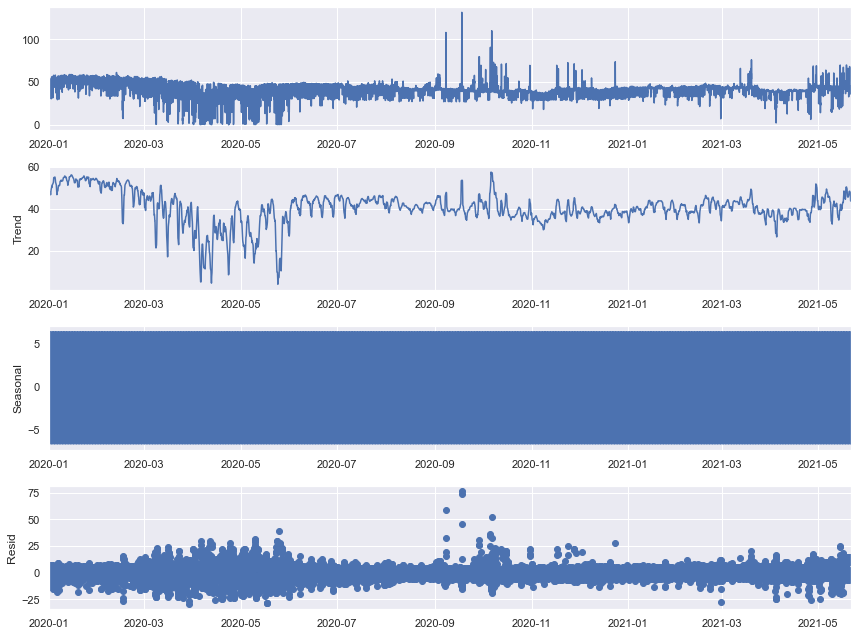

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_data, model='additive', period = 24) 
result.plot()
plt.show();

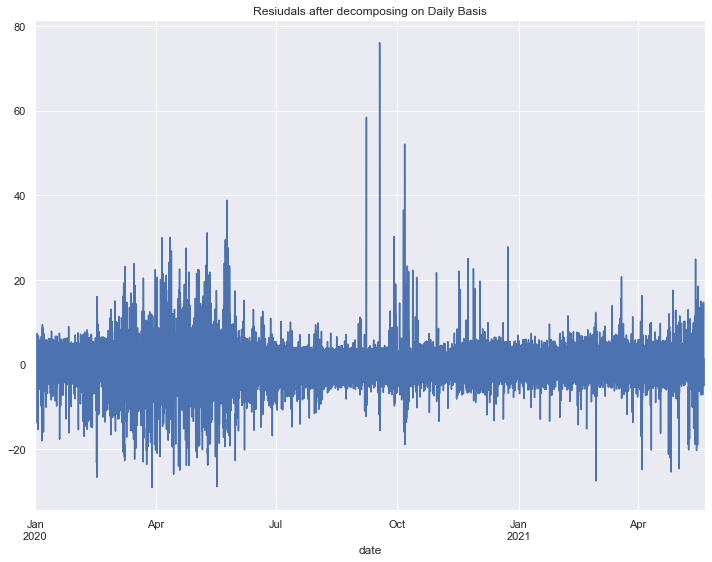

In [34]:
result.resid.plot()
plt.title("Resiudals after decomposing on Daily Basis")
plt.show();

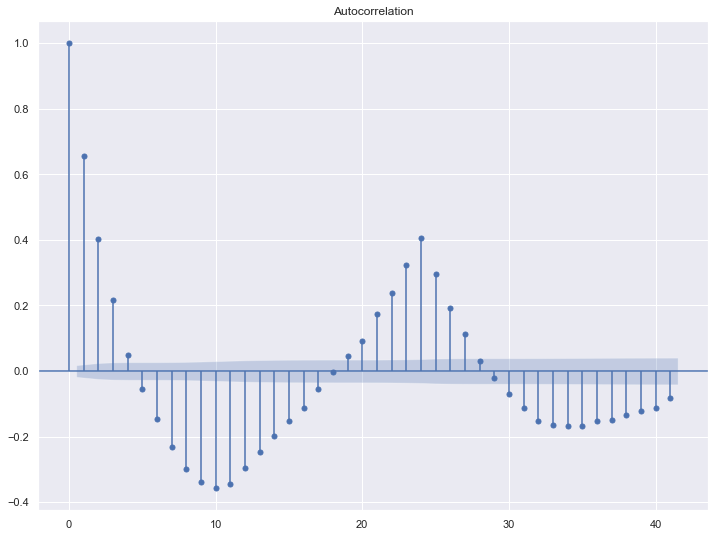

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(result.resid.dropna())
plt.show();

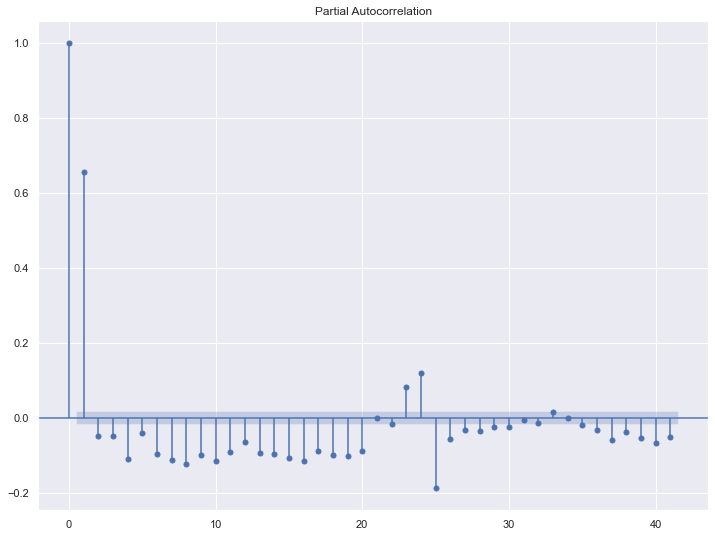

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(result.resid.dropna())
plt.show();

## 5 ) Getting the Data stationary 

### Differencing 

- We see that zero mean assumption and constant variance assumptions seem to be held except some outlier points. But the correlation at lag 24 is still there, so I decided to seasonal difference the train data.    

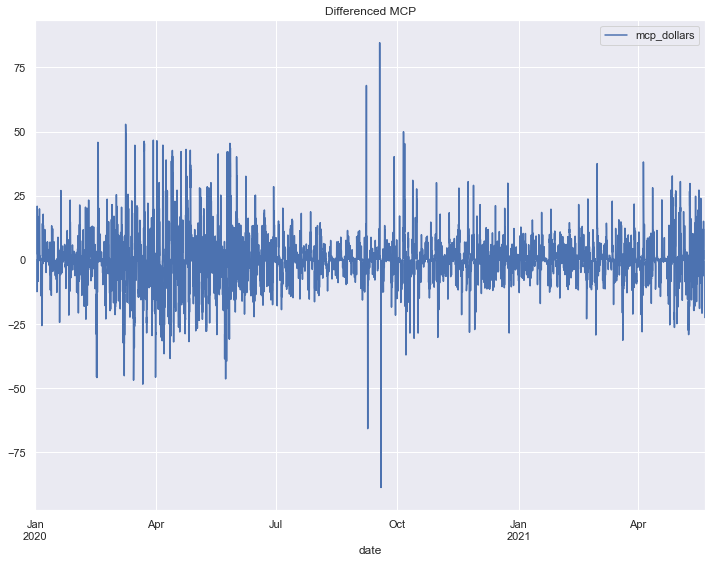

In [46]:
train_data_diff = train_data.diff(periods = 24)
train_data_diff.plot()
plt.title("Differenced MCP")
plt.show();

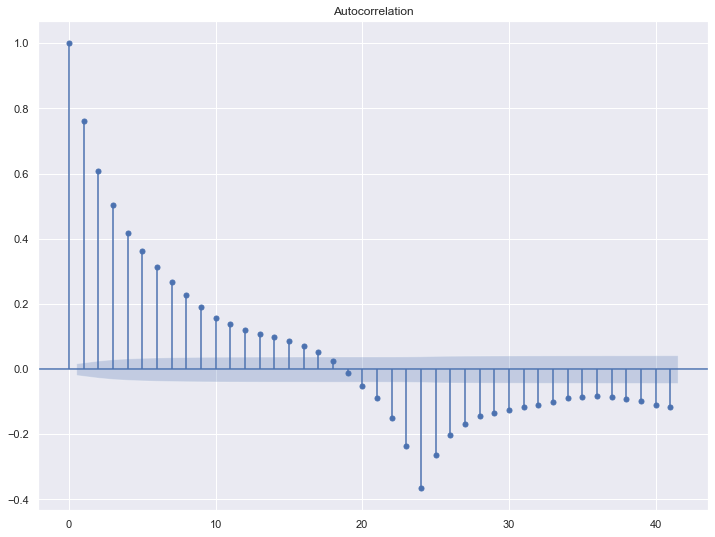

In [47]:
plot_acf(train_data_diff.dropna())
plt.show();

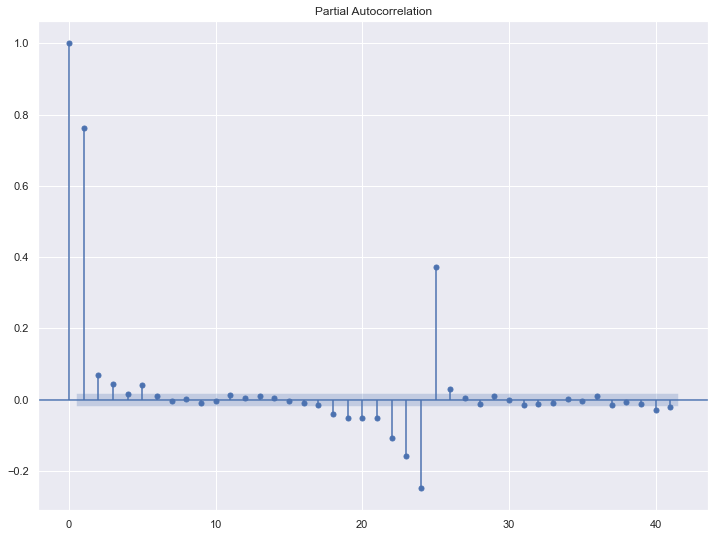

In [48]:
plot_pacf(train_data_diff.dropna())
plt.show();

In [45]:
#ADF statistic to check stationarity
from statsmodels.tsa.stattools import adfuller
t = train_data_diff.dropna()
timeseries = adfuller(t)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in timeseries[4].items():
    print('\t%s: %.3f' % (key, value))
if timeseries[0] > timeseries[4]["5%"]:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
    print ("Reject Ho - Time Series is Stationary")

TypeError: 'DecomposeResult' object is not subscriptable

- After differencing, we have a stationary series so we can model now. 

## 6 ) Model Preparation
- Since my computer is not powerful I am going to run the model with a small subset. I also run the autoarima function on my R kernel this is finest result I found. Yes I did not do neighborhood search but my computer crashed several times while I was trying, so that's the best I can do with this computer. 

In [141]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train_data, order=(3,0,1), seasonal_order=(1,0,1,24))
res = model.fit(disp=False)
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        mcp_dollars   No. Observations:                12168
Model:             SARIMAX(3, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -34869.161
Date:                            Mon, 21 Jun 2021   AIC                          69752.322
Time:                                    20:33:49   BIC                          69804.168
Sample:                                01-01-2020   HQIC                         69769.702
                                     - 05-21-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6779      0.007    241.144      0.000       1.664       1.691
ar.L2         -0.6413      0.007   

In [149]:
from pmdarima.utils import diff_inv

def inv_diff (df_orig_column,df_diff_column, periods):
    # Generate np.array for the diff_inv function - it includes first n values(n = 
    # periods) of original data & further diff values of given periods
    value = np.array(df_orig_column[:periods].tolist()+df_diff_column[periods:].tolist())

    # Generate np.array with inverse diff
    inv_diff_vals = diff_inv(value, periods,1 )[periods:]
    return inv_diff_vals

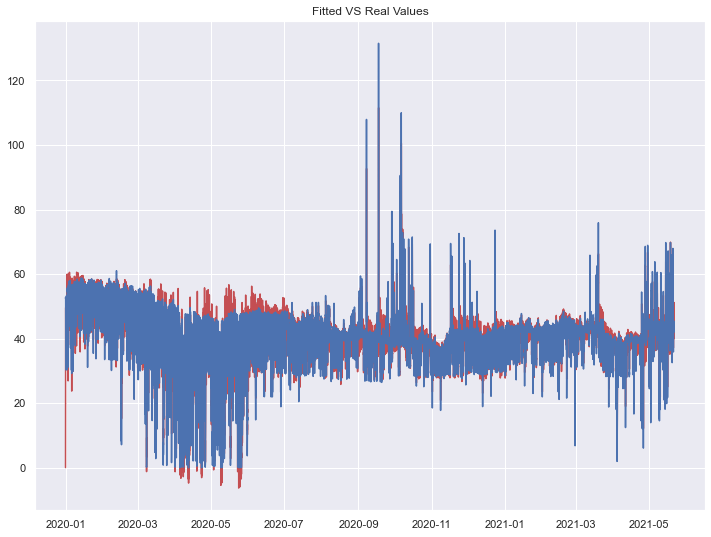

In [144]:
new_df = pd.DataFrame(res.predict(),  index =train_data.index)
new_df.columns = ["Fitted"]
new_df["Real"] = train_data
plt.plot(train_data.index,new_df.Fitted, c = "r")
plt.plot(train_data.index,new_df.Real, c = "b")
plt.title("Fitted VS Real Values")
plt.show()

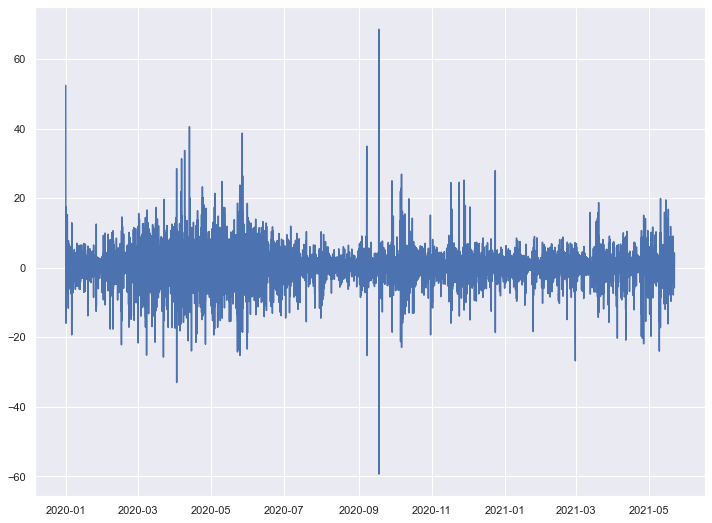

In [145]:
plt.plot(res.resid);

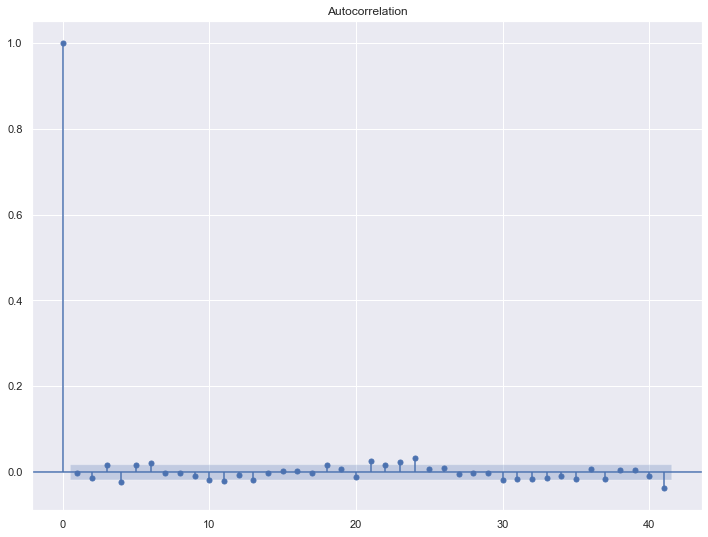

In [148]:
plot_acf(res.resid)
plt.show();

- So the residuals are not correlated as shown in the ACF plot and zero mean, constant variance assumptions seems to be held. We can forecast our future values with this model and calculate errors. 

In [161]:
arima_forecast = res.forecast(24*31)
arima_forecast

2021-05-22 00:00:00    42.384959
2021-05-22 01:00:00    42.319321
2021-05-22 02:00:00    41.825764
2021-05-22 03:00:00    41.335355
2021-05-22 04:00:00    40.892567
                         ...    
2021-06-21 19:00:00    40.386124
2021-06-21 20:00:00    43.120808
2021-06-21 21:00:00    42.540436
2021-06-21 22:00:00    39.509883
2021-06-21 23:00:00    34.788059
Freq: H, Name: predicted_mean, Length: 744, dtype: float64

In [162]:
test_data

,mcp_dollars
date,
2021-05-22 00:00:00,44.94
2021-05-22 01:00:00,44.25
2021-05-22 02:00:00,43.40
2021-05-22 03:00:00,42.93
2021-05-22 04:00:00,42.34
...,...
2021-06-21 19:00:00,51.16
2021-06-21 20:00:00,65.21
2021-06-21 21:00:00,65.21


In [176]:
arima_forecast = pd.DataFrame(arima_forecast)

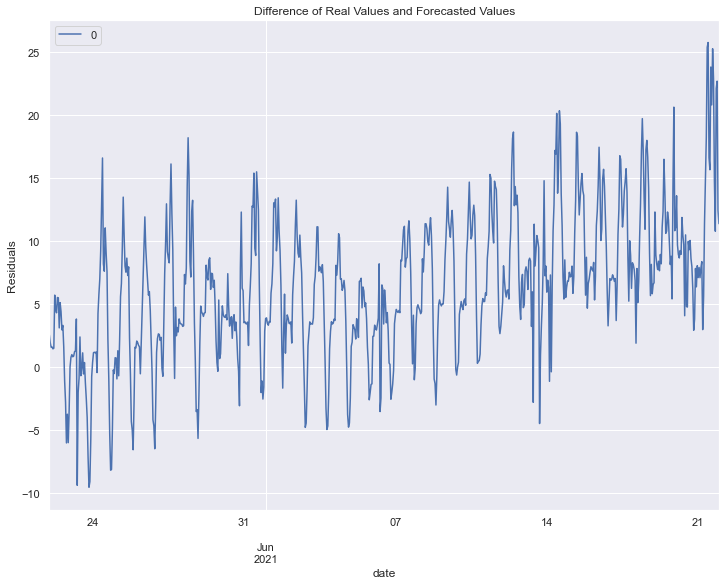

In [179]:
errors = test_data.mcp_dollars - arima_forecast.predicted_mean
err_df = pd.DataFrame(errors, index = test_data.index)
err_df.plot()
plt.ylabel("Residuals")
plt.title("Difference of Real Values and Forecasted Values")
plt.legend()
plt.show();

# METHOD B

In [180]:
train_data.insert(1, 'trend', range(1,len(train_data)+1)) #trend component 


In [181]:
train_data["day"] = mcp["day"]
train_data["month"] = mcp["month"]
train_data["hour"] = mcp["hour"]

## Regression Model without external vairables 

In [182]:
regressors  = train_data.drop("mcp_dollars" , axis = 'columns' )
regressors

,trend,day,month,hour
date,,,,
2020-01-01 00:00:00,1,2,1,0
2020-01-01 01:00:00,2,2,1,1
2020-01-01 02:00:00,3,2,1,2
2020-01-01 03:00:00,4,2,1,3
2020-01-01 04:00:00,5,2,1,4
...,...,...,...,...
2021-05-21 19:00:00,12164,4,5,19
2021-05-21 20:00:00,12165,4,5,20
2021-05-21 21:00:00,12166,4,5,21


In [183]:
y = train_data.mcp_dollars
lm = sm.OLS(y.astype(float),regressors)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            mcp_dollars   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                          1.744e+04
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                        0.00
Time:                        20:54:30   Log-Likelihood:                         -51014.
No. Observations:               12168   AIC:                                  1.020e+05
Df Residuals:                   12164   BIC:                                  1.021e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
trend          0.0015   3.76e-05     38.575      0.000       0.001       0.002
day            2.2100      0.065     34.261      0.000       2.084       2.336
month          1.1059      0.039     28.068      0.000       1.029       1.183
hour           1.2909      0.018     71.312      0.000       1.255       1.326
==============================================================================
Omnibus:                       77.646   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.977
Skew:                           0.178   Prob(JB):                     2.61e-18
Kurtosis:                       3.183   Cond. No.                     3.17e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Without the external variables, only with the seasonal components, the model adjusted R -squared is fine and also the all variables seems significant. Now we can improve with further information in the MCP dataset. Renewable energies to the overall production ratio could be a good information.

In [184]:
mcp["ratio"] = (mcp["natural_gas"] + mcp["wind"] + mcp["geothermal"] + mcp["biomass"] + mcp["river"] + mcp["dam"]) / mcp["total_prod"]
train_data["ratio"] = mcp["ratio"]
regressors["ratio"] = train_data["ratio"]

In [185]:
y = train_data.mcp_dollars
lm = sm.OLS(y.astype(float),regressors)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            mcp_dollars   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                          3.051e+04
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                        0.00
Time:                        20:54:31   Log-Likelihood:                         -46765.
No. Observations:               12168   AIC:                                  9.354e+04
Df Residuals:                   12163   BIC:                                  9.358e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
trend      -7.341e-05   2.99e-05     -2.455      0.014      -0.000   -1.48e-05
day           -0.0560      0.050     -1.124      0.261      -0.154       0.042
month          0.0319      0.029      1.085      0.278      -0.026       0.090
hour           0.2870      0.016     18.337      0.000       0.256       0.318
ratio         56.7421      0.512    110.872      0.000      55.739      57.745
==============================================================================
Omnibus:                     3930.573   Durbin-Watson:                   0.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20340.323
Skew:                          -1.469   Prob(JB):                         0.00
Kurtosis:                       8.611   Cond. No.                     3.51e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Our model has improved but we lost some significancy in some variables, lastly we can add the load_plan variable and discard day and month variables to see if the model improve 

In [186]:
#regressors.drop("month" , axis = 'columns' , inplace = True)
regressors.drop("day" , axis = 'columns', inplace = True )
regressors["load_plan"] = mcp["load_plan"]

In [187]:
y = train_data.mcp_dollars
lm = sm.OLS(y.astype(float),regressors)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            mcp_dollars   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                          5.655e+04
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                        0.00
Time:                        20:54:32   Log-Likelihood:                         -43222.
No. Observations:               12168   AIC:                                  8.645e+04
Df Residuals:                   12163   BIC:                                  8.649e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
trend         -0.0006   2.29e-05    -24.860      0.000      -0.001      -0.001
month         -0.2621      0.022    -11.826      0.000      -0.306      -0.219
hour          -0.0983      0.012     -7.963      0.000      -0.122      -0.074
ratio         -7.1560      0.737     -9.709      0.000      -8.601      -5.711
load_plan      0.0015   1.54e-05     98.052      0.000       0.001       0.002
==============================================================================
Omnibus:                     1150.173   Durbin-Watson:                   0.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8477.285
Skew:                          -0.078   Prob(JB):                         0.00
Kurtosis:                       7.086   Cond. No.                     3.33e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Our final model seems promising we can check normallity assumptions and residuals. 

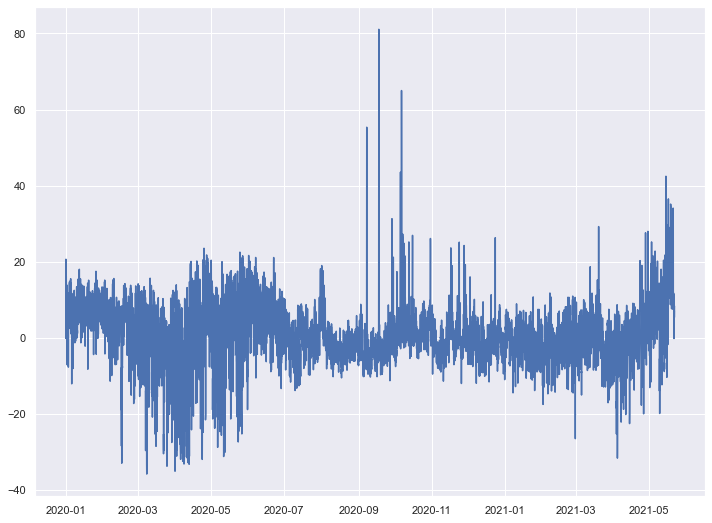

In [188]:
plt.plot(model.resid)

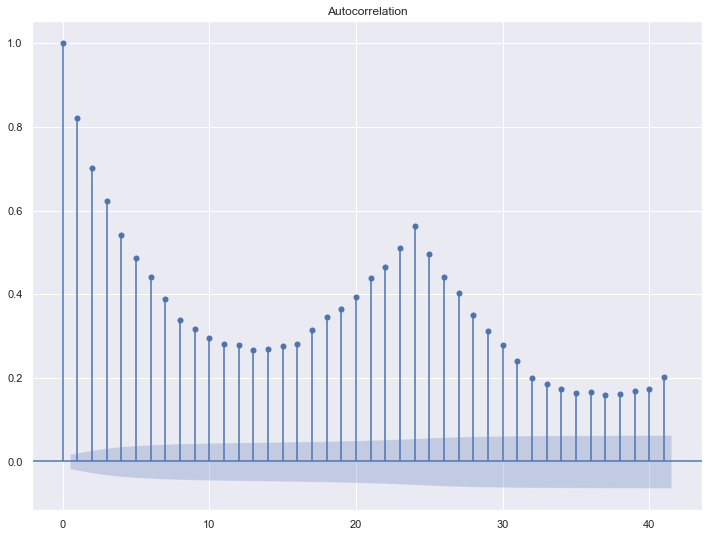

In [189]:
plot_acf(model.resid)
plt.show();

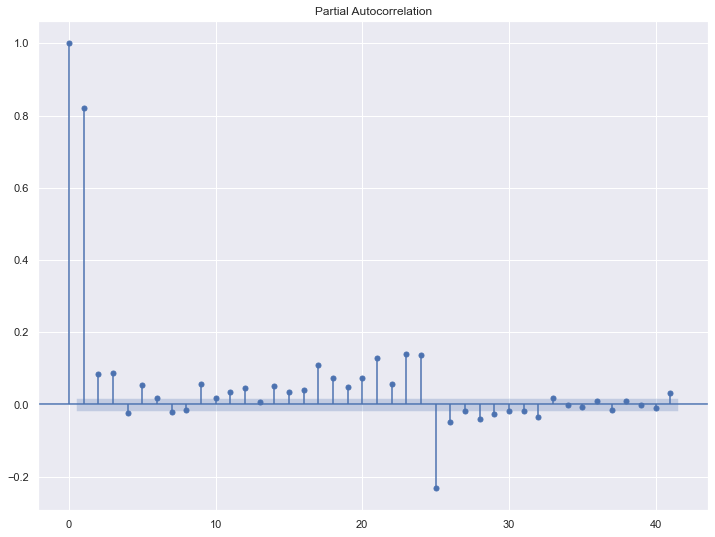

In [190]:
plot_pacf(model.resid)
plt.show();

- Since we have a seasonality on residuals of final model, we should get rid of it by adding a lag variable. 

In [191]:
lag = y.shift(-1)
regressors["lag"] = lag
regressors.drop(regressors.tail(1).index, inplace = True)
regressors

,trend,month,hour,ratio,load_plan,lag
date,,,,,,
2020-01-01 00:00:00,1,1,0,0.509088,29000,52.73
2020-01-01 01:00:00,2,1,1,0.477196,26000,52.37
2020-01-01 02:00:00,3,1,2,0.450457,24500,52.30
2020-01-01 03:00:00,4,1,3,0.428947,23400,33.67
2020-01-01 04:00:00,5,1,4,0.422831,22900,30.30
...,...,...,...,...,...,...
2021-05-21 18:00:00,12163,5,18,0.759439,35052,45.12
2021-05-21 19:00:00,12164,5,19,0.763861,35542,45.40
2021-05-21 20:00:00,12165,5,20,0.772328,36990,45.24


In [192]:
y

date
2020-01-01 00:00:00    52.46
2020-01-01 01:00:00    52.73
2020-01-01 02:00:00    52.37
2020-01-01 03:00:00    52.30
2020-01-01 04:00:00    33.67
                       ...  
2021-05-21 19:00:00    45.12
2021-05-21 20:00:00    45.40
2021-05-21 21:00:00    45.24
2021-05-21 22:00:00    45.25
2021-05-21 23:00:00    44.27
Name: mcp_dollars, Length: 12168, dtype: float64

In [193]:
y.drop(y.tail(1).index,inplace = True)
lm = sm.OLS(y.astype(float),regressors)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            mcp_dollars   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          1.374e+05
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                        0.00
Time:                        20:54:36   Log-Likelihood:                         -36873.
No. Observations:               12167   AIC:                                  7.376e+04
Df Residuals:                   12161   BIC:                                  7.380e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
trend         -0.0001   1.39e-05     -8.823      0.000      -0.000   -9.56e-05
month         -0.0578      0.013     -4.367      0.000      -0.084      -0.032
hour          -0.0174      0.007     -2.371      0.018      -0.032      -0.003
ratio         -2.2802      0.439     -5.197      0.000      -3.140      -1.420
load_plan      0.0003   1.21e-05     27.036      0.000       0.000       0.000
lag            0.7944      0.005    149.496      0.000       0.784       0.805
==============================================================================
Omnibus:                     2657.578   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107426.029
Skew:                           0.198   Prob(JB):                         0.00
Kurtosis:                      17.551   Cond. No.                     3.34e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

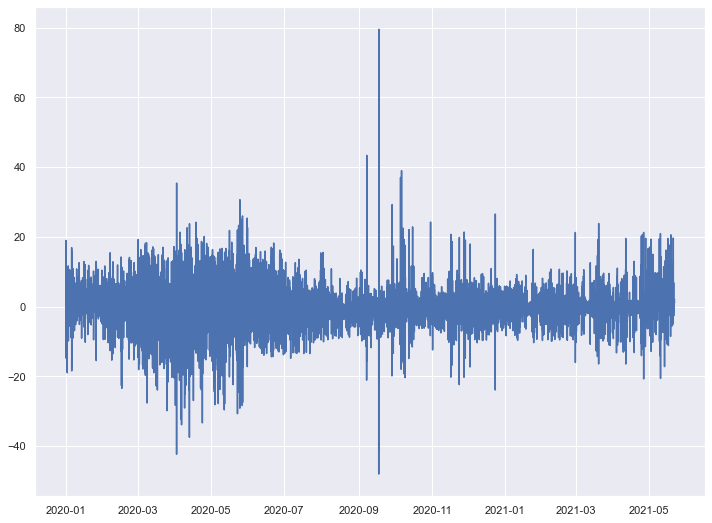

In [194]:
plt.plot(model.resid);

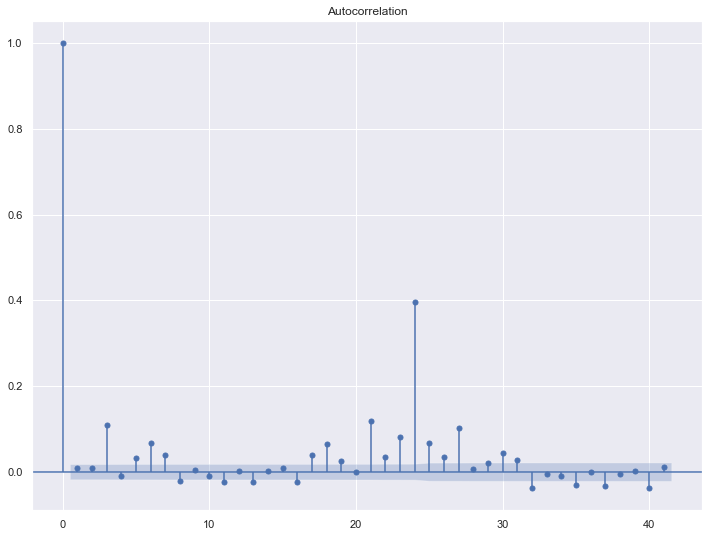

In [195]:
plot_acf(model.resid)
plt.show();

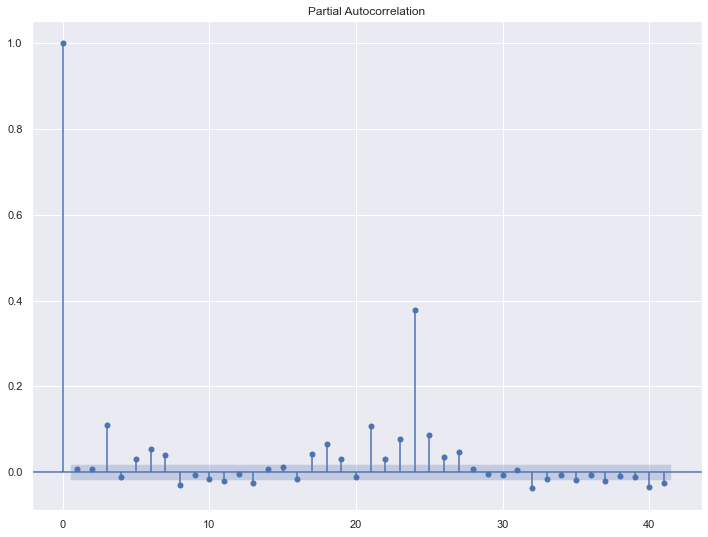

In [196]:
plot_pacf(model.resid)
plt.show();

## So in the final model, residuals seems like WN series and ACF, PACF plots show that there is no autocorrelation or seasonality on the residuals. So we can predict our values with this model. 

## 9 ) Performance Measures 

# Conclusion